# Node profile dissimilarity visualization

> **Analysis type**: Multiple γ (visualization)

In [1]:
import json
from os.path import join

import numpy as np
import pandas as pd
from dn_utils.path import path

In [2]:
atlas = "combined_roi"
gamma_range = np.arange(0.5, 2.5, 0.5)

In [3]:
path_corrmats = join(path["bsc"], "corrmats")
path_corrmats_unthr = join(path_corrmats, atlas, "unthr")

df_dissim = {}
for gamma in gamma_range:
    gamma_str = str(float(gamma)).replace(".", "_")
    path_corrmats_unthr_gamma = join(path_corrmats_unthr, f"gamma_{gamma_str}")
    df_dissim[gamma] = pd.read_csv(join(path_corrmats_unthr_gamma, "node_profile_dissimilarity.csv"))
    
df_dissim = pd.concat(df_dissim.values(), axis=1, join="inner")
df_dissim = df_dissim.loc[:,~df_dissim.columns.duplicated()]
df_dissim = df_dissim.loc[:,~df_dissim.columns.str.startswith('Unnamed')]

n_roi = len(df_dissim)

In [4]:
from nilearn.plotting import plot_connectome
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from IPython.display import display

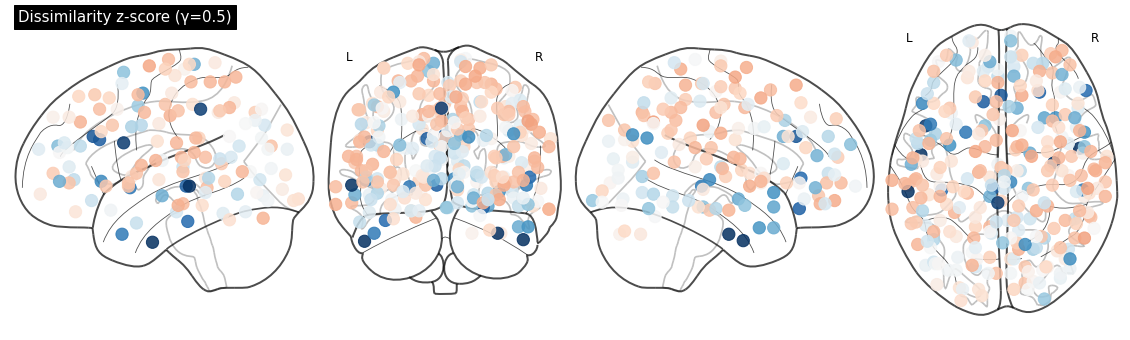

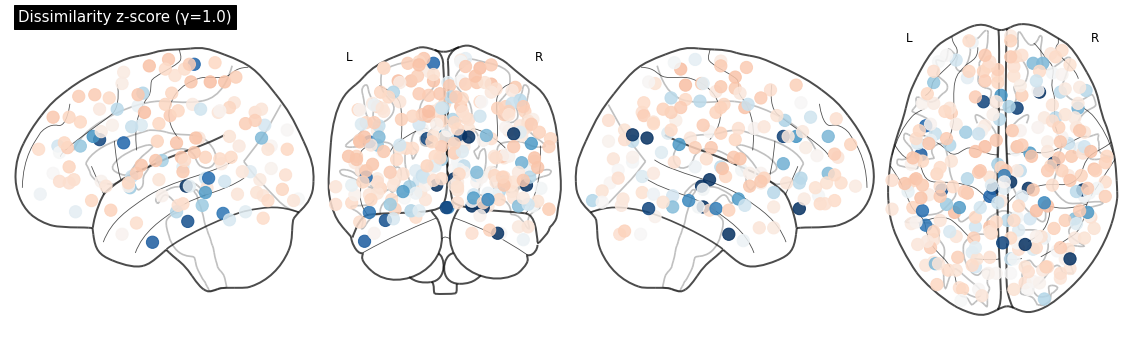

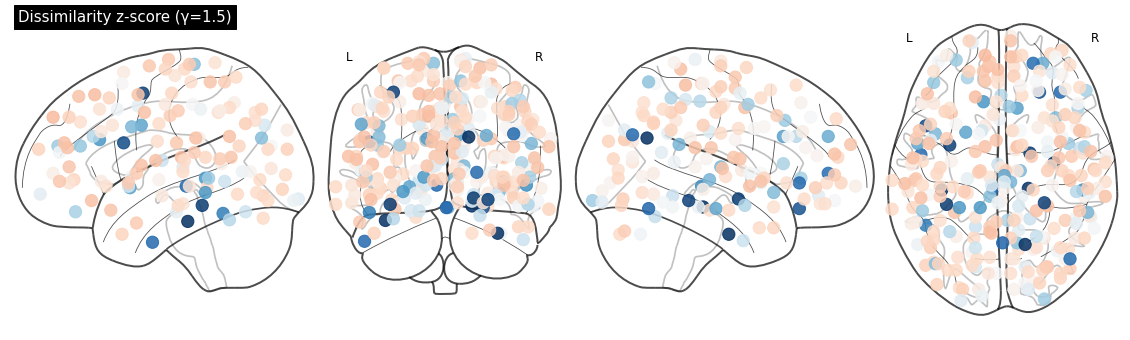

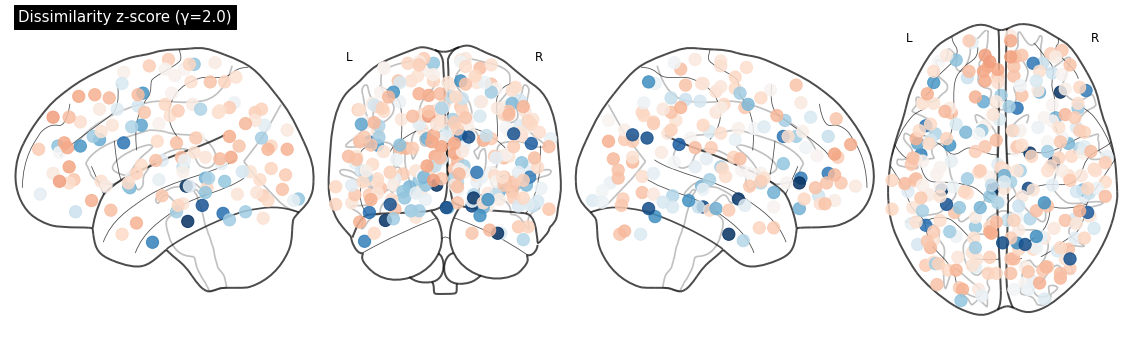

In [16]:
# Helpers
norm = mpl.colors.Normalize(vmin=-3, vmax=3)
m = cm.ScalarMappable(norm=norm, cmap=cm.RdBu_r)
transparency = lambda col: col[:3] + (0.85,)

for gamma in gamma_range:
    gamma_str = str(float(gamma)).replace(".", "_")

    values = df_dissim[f"dissim_zscore_{gamma_str}"] 
    colors = values.map(m.to_rgba)
    colors = colors.map(transparency)

    fig, ax = plt.subplots(figsize=(20, 6), facecolor="w")
    plot_connectome(
        adjacency_matrix=np.zeros((n_roi, n_roi)),
        node_coords=df_dissim[["x", "y", "z"]],
        node_color=list(colors),
        node_size=150,
        display_mode="lyrz",
        title=f"Dissimilarity z-score (γ={gamma})",
        axes=ax
    )

In [6]:
for gamma in gamma_range: 
    gamma_str = str(float(gamma)).replace(".", "_")
    print(f"gamma = {gamma}")
    display(df_dissim.loc[df_dissim[f"pval_fdr_{gamma_str}"] < 0.05, :])

gamma = 0.5


,x,y,z,netCode,netColor,netName,radius(mm),origNetName,strategy,origName,...,dissim_con_2_0,dissim_zscore_2_0,dissim_perr_zscore_2_0,dissim_con_zscore_2_0,pval_unc_2_0,pval_perr_unc_2_0,pval_con_unc_2_0,pval_fdr_2_0,pval_perr_fdr_2_0,pval_con_fdr_2_0
40,33,-12,-34,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.592164,-3.167965,-3.393939,-3.609954,0.0004,0.0006,0.0003,0.053600,0.053600,0.040200
43,49,-3,-38,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.809306,-0.864238,-0.974804,-0.718384,0.1969,0.1662,0.2356,0.886227,0.891793,0.878231
49,-50,-7,-39,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.743564,-2.048919,-2.399123,-1.593839,0.0191,0.0108,0.0576,0.301106,0.239138,0.671165
206,-58,-30,-4,5.0,Red,default_mode,5,default_mode,NaN,NaN,...,0.851865,-0.368901,-0.294393,-0.151642,0.3583,0.3760,0.4366,0.886227,0.891793,0.878231


gamma = 1.0


,x,y,z,netCode,netColor,netName,radius(mm),origNetName,strategy,origName,...,dissim_con_2_0,dissim_zscore_2_0,dissim_perr_zscore_2_0,dissim_con_zscore_2_0,pval_unc_2_0,pval_perr_unc_2_0,pval_con_unc_2_0,pval_fdr_2_0,pval_perr_fdr_2_0,pval_con_fdr_2_0
36,51,-29,-4,11.0,Teal,ventral_attention,5,ventral_attention,NaN,NaN,...,0.741717,-1.343627,-0.665867,-1.618436,0.0853,0.2468,0.0558,0.740026,0.891793,0.671165
40,33,-12,-34,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.592164,-3.167965,-3.393939,-3.609954,0.0004,0.0006,0.0003,0.053600,0.053600,0.040200
51,24,32,-18,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.789800,-1.425719,-1.623111,-0.978139,0.0730,0.0535,0.1644,0.739310,0.597417,0.878231
53,17,-28,-17,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.641377,-2.722156,-1.955411,-2.954608,0.0028,0.0243,0.0014,0.093800,0.407025,0.075040
63,6,-24,0,10.0,Brown,subcortical,5,subcortical,NaN,NaN,...,0.802763,-1.006655,-0.753266,-0.805516,0.1566,0.2208,0.2065,0.886227,0.891793,0.878231
66,-5,-28,-4,10.0,Brown,subcortical,5,subcortical,NaN,NaN,...,0.623546,-2.988099,-2.546604,-3.192066,0.0011,0.0061,0.0006,0.064320,0.211050,0.040200
109,10,22,27,9.0,Black,salience,5,salience,NaN,NaN,...,0.686876,-2.224604,-2.328317,-2.348720,0.0122,0.0110,0.0104,0.251250,0.239138,0.253382
190,43,-72,28,5.0,Red,default_mode,5,default_mode,NaN,NaN,...,0.697961,-2.608354,-2.698840,-2.201110,0.0041,0.0036,0.0167,0.114509,0.192960,0.319686
231,15,-63,26,5.0,Red,default_mode,5,default_mode,NaN,NaN,...,0.730761,-2.655165,-3.296050,-1.764332,0.0028,0.0006,0.0381,0.093800,0.053600,0.538680


gamma = 1.5


,x,y,z,netCode,netColor,netName,radius(mm),origNetName,strategy,origName,...,dissim_con_2_0,dissim_zscore_2_0,dissim_perr_zscore_2_0,dissim_con_zscore_2_0,pval_unc_2_0,pval_perr_unc_2_0,pval_con_unc_2_0,pval_fdr_2_0,pval_perr_fdr_2_0,pval_con_fdr_2_0
40,33,-12,-34,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.592164,-3.167965,-3.393939,-3.609954,0.0004,0.0006,0.0003,0.053600,0.053600,0.040200
53,17,-28,-17,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.641377,-2.722156,-1.955411,-2.954608,0.0028,0.0243,0.0014,0.093800,0.407025,0.075040
54,-37,-29,-26,-1.0,White,uncertain,5,uncertain,NaN,NaN,...,0.645683,-3.081935,-3.146336,-2.897274,0.0007,0.0008,0.0017,0.062533,0.053600,0.075933
231,15,-63,26,5.0,Red,default_mode,5,default_mode,NaN,NaN,...,0.730761,-2.655165,-3.296050,-1.764332,0.0028,0.0006,0.0381,0.093800,0.053600,0.538680


gamma = 2.0


,x,y,z,netCode,netColor,netName,radius(mm),origNetName,strategy,origName,...,dissim_con_2_0,dissim_zscore_2_0,dissim_perr_zscore_2_0,dissim_con_zscore_2_0,pval_unc_2_0,pval_perr_unc_2_0,pval_con_unc_2_0,pval_fdr_2_0,pval_perr_fdr_2_0,pval_con_fdr_2_0
116,37,32,-2,9.0,Black,salience,5,salience,NaN,NaN,...,0.761367,-3.734587,-5.02585,-1.356764,0.0001,0.0,0.0871,0.0268,0.0,0.752994
